

## Task Description: Real Estate Price Prediction

This task involves predicting the price of real estate properties based on various features that influence the value of a property. The dataset contains several attributes of real estate properties such as square footage, the number of bedrooms, bathrooms, floors, the year the property was built, whether the property has a garden or pool, the size of the garage, the location score, and the distance from the city center.

The goal is to build a regression model that can predict the Price of a property based on the provided features.

Dataset Columns:

ID: A unique identifier for each property.

Square_Feet: The area of the property in square meters.

Num_Bedrooms: The number of bedrooms in the property.

Num_Bathrooms: The number of bathrooms in the property.

Num_Floors: The number of floors in the property.

Year_Built: The year the property was built.

Has_Garden: Indicates whether the property has a garden (1 for yes, 0 for no).

Has_Pool: Indicates whether the property has a pool (1 for yes, 0 for no).

Garage_Size: The size of the garage in square meters.

Location_Score: A score from 0 to 10 indicating the quality of the neighborhood (higher scores indicate better neighborhoods).

Distance_to_Center: The distance from the property to the city center in kilometers.

Price: The target variable that represents the price of the property. This is the value we aim to predict.

Objective:
The goal of this task is to develop a regression model that predicts the Price of a real estate property using the other features as inputs. The model should be able to learn the relationship between these features and the price, providing an accurate prediction for unseen data.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [51]:
dataset = pd.read_csv('real_estate_dataset.csv')

In [52]:
dataset.isnull().sum()

ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

In [53]:
# independent and dependet features
x = dataset.drop(['Price'],axis=1)
y = dataset['Price']

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 43.1 KB


In [55]:
x.drop(['ID'],axis=1,inplace=True)

## Split train and test data 

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [57]:
# scaling the dataset 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# numeric features
num_features = [feature for feature in x.columns if x.columns.dtype != 'o' ]

In [58]:
scalar = StandardScaler()
transformer = ColumnTransformer(
    transformers = [
            ('numeric',scalar,num_features)
    ]
)

In [59]:
# scaling 
X_scaled_train = transformer.fit_transform(x_train)
X_scaled_test = transformer.transform(x_test)

In [60]:
pd.DataFrame(X_scaled_train)

,0,1,2,3,4,5,6,7,8,9
0,-0.715999,-1.349236,1.238150,1.307531,-0.089167,0.913708,-0.985111,0.446042,-0.734852,-0.850733
1,-1.322680,1.393810,-1.183659,1.307531,0.311906,-1.094442,1.015114,-1.194771,-0.115710,0.539145
2,1.099175,-0.663474,1.238150,-1.200922,0.884867,0.913708,-0.985111,1.482345,-1.221932,-0.440629
3,0.946596,0.708049,1.238150,1.307531,-0.977257,0.913708,-0.985111,1.395986,-0.441303,-0.651598
4,-0.419581,-0.663474,1.238150,0.053305,0.197314,-1.094442,1.015114,-0.158468,-1.344410,-0.377762
...,...,...,...,...,...,...,...,...,...,...
395,-1.377345,1.393810,-1.183659,0.053305,0.541090,0.913708,1.015114,0.618759,0.241343,0.888047
396,1.141813,0.022287,-1.183659,1.307531,-1.206442,0.913708,-0.985111,1.655062,1.249325,1.292400
397,1.245449,1.393810,-1.183659,1.307531,0.455146,0.913708,1.015114,0.791476,1.457212,0.399235
398,1.188542,-0.663474,0.027245,0.053305,-1.464274,0.913708,1.015114,0.964193,-0.178793,-0.526754


## Traning model

In [84]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
models = {
    "Linear regression":LinearRegression(),
    "Lasso Regression":Lasso(),
    "Rigde Regression":Ridge(),
    "ElasticNet":ElasticNet()
}

In [85]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

for col in list(models):
    model = models[col]
    model.fit(X_scaled_train,y_train)
    y_pred = model.predict(X_scaled_test)

    score = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    adj_r = (1-(1-score)*((len(X_scaled_test)-1))/(len(X_scaled_test) - len(x.columns) - 1))

    print(col)
    print(f"R^2 Value:{score}")    
    print(f"Adjusted R^2 value:{adj_r}")    
    print(f"Mean Squared error:{mse}")    
    print(f"Mean Absolute error:{mae}")  
    print()  
    

Linear regression
R^2 Value:0.9752624071277095
Adjusted R^2 value:0.9724829023105982
Mean Squared error:339559062.34494233
Mean Absolute error:14607.110175890448

Lasso Regression
R^2 Value:0.9752609492503973
Adjusted R^2 value:0.9724812806268465
Mean Squared error:339579073.8091013
Mean Absolute error:14607.752808823383

Rigde Regression
R^2 Value:0.9751471573707569
Adjusted R^2 value:0.972354703142752
Mean Squared error:341141031.1164523
Mean Absolute error:14651.802834205211

ElasticNet
R^2 Value:0.8413664917567104
Adjusted R^2 value:0.8235425020664532
Mean Squared error:2177473192.0629473
Mean Absolute error:35110.5729420211



## Hyperparameter Tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV

# cv models
cv_models = {
    "Ridge":Ridge(),
    "Lasso":Lasso()
}

In [100]:
# parameters
params  = [
    {"Ridge":[0.1, 1, 10, 100]}, 
    {"Lasso":[0.1, 1, 10, 100]}, 
]

Intercept (w0): -3.922303896776963
Coefficient (w1): 1.1206952510393664


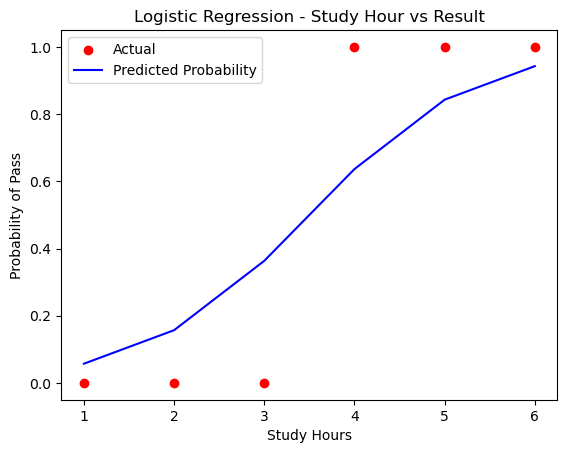

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Data
x = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1, 1])

# Step 1: Train logistic regression model
model = LogisticRegression()
model.fit(x, y)

# Step 2: Extract parameters
w0 = model.intercept_[0]
w1 = model.coef_[0][0]

print("Intercept (w0):", w0)
print("Coefficient (w1):", w1)

# Step 3: Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 4: Predict probabilities
z = w0 + w1 * x
p = sigmoid(z)

# Step 5: Plot
plt.scatter(x, y, color='red', label='Actual')
plt.plot(x, p, color='blue', label='Predicted Probability')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Pass')
plt.legend()
plt.title('Logistic Regression - Study Hour vs Result')
plt.show()
